<a href="https://colab.research.google.com/github/Johnnyjrb/TelecomX_2/blob/main/TelecomX_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carga de Datos

In [49]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    roc_curve,
    auc,
    RocCurveDisplay,
    precision_recall_curve,
    PrecisionRecallDisplay,
    average_precision_score,
)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import warnings
from sklearn.metrics import RocCurveDisplay

## Cargando archivo json


In [50]:
datos_clientes_final = pd.read_json('datos_clientes_final.json')
datos_clientes_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [51]:
datos_clientes_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 
 17  

In [52]:
datos_clientes_final.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7267.000000,7267.000000,7267.000000,7256.000000
mean,0.162653,32.346498,64.720098,2280.634213
std,0.369074,24.571773,30.129572,2268.632997
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.425000,400.225000
50%,0.000000,29.000000,70.300000,1391.000000
75%,0.000000,55.000000,89.875000,3785.300000
max,1.000000,72.000000,118.750000,8684.800000


### Convertir la columna 'customerID' al formato correcto

### Convertir la columna 'TotalCharges' a tipo numérico, tratando los errores

In [53]:
datos_clientes_final['Charges.Total'] = pd.to_numeric(datos_clientes_final['Charges.Total'], errors='coerce')
datos_clientes_final['Charges.Total'].fillna(0, inplace=True)
print(datos_clientes_final['Charges.Total'].isnull().sum())

0


/tmp/ipython-input-3980676362.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_clientes_final['Charges.Total'].fillna(0, inplace=True)


In [54]:
X = datos_clientes_final.drop(columns=['customerID', 'Churn'], axis=1)
y = datos_clientes_final['Churn']
for col in datos_clientes_final.columns:
  if col not in ['customerID', 'Churn']:
        datos_clientes_final[col] = pd.to_numeric(datos_clientes_final[col], errors='coerce')
datos_clientes_final.fillna(0, inplace=True)
print("Tipos de datos después de la limpieza:")
print(datos_clientes_final.dtypes)

Tipos de datos después de la limpieza:
customerID           object
Churn                object
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
Charges.Monthly     float64
Charges.Total       float64
dtype: object


### Rellenar valores nulos en 'TotalCharges' con 0

In [55]:
datos_clientes_final['Charges.Total'].fillna(0, inplace=True)

/tmp/ipython-input-3513105947.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_clientes_final['Charges.Total'].fillna(0, inplace=True)


### Convertir la columna 'Churn' a formato binario (0 y 1)

In [56]:
datos_clientes_final['Churn'] = datos_clientes_final['Churn'].replace({'Yes': 1, 'No': 0, '': np.nan})
datos_clientes_final.dropna(subset=['Churn'], inplace=True)
datos_clientes_final['Churn'] = datos_clientes_final['Churn'].astype(int)
datos_clientes_final['Churn'].value_counts(normalize=True)

/tmp/ipython-input-3953166871.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_clientes_final['Churn'] = datos_clientes_final['Churn'].replace({'Yes': 1, 'No': 0, '': np.nan})


,proportion
Churn,
0,0.73463
1,0.26537


In [57]:
datos_clientes_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   float64
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   float64
 5   Dependents        7043 non-null   float64
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   float64
 8   MultipleLines     7043 non-null   float64
 9   InternetService   7043 non-null   float64
 10  OnlineSecurity    7043 non-null   float64
 11  OnlineBackup      7043 non-null   float64
 12  DeviceProtection  7043 non-null   float64
 13  TechSupport       7043 non-null   float64
 14  StreamingTV       7043 non-null   float64
 15  StreamingMovies   7043 non-null   float64
 16  Contract          7043 non-null   float64
 17  

## 2. Análisis Exploratorio de Datos y Preparación para el Modelado

#### Proporción de cancelación

Proporción de cancelación (Churn):
 Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


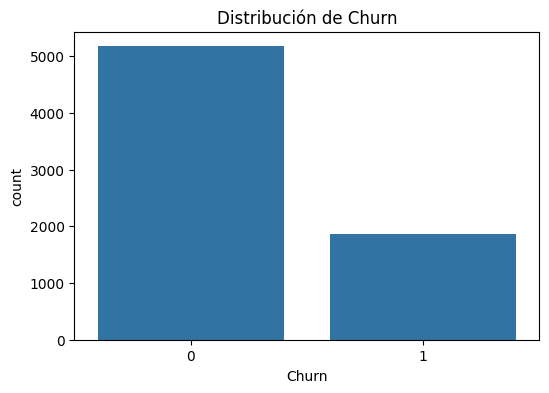

In [58]:
churn_proportion = datos_clientes_final['Churn'].value_counts(normalize=True)
print("Proporción de cancelación (Churn):\n", churn_proportion)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=datos_clientes_final)
plt.title('Distribución de Churn')
plt.show()

#### Separar características y la variable objetivo

In [59]:
X = datos_clientes_final.drop(columns=['customerID', 'Churn'])
y = datos_clientes_final['Churn']

#### Separar columnas numéricas y categóricas

In [60]:
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'bool']).columns.tolist()

#### Separación de datos en conjuntos de entrenamiento y prueba

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Forma de X_train: {X_train.shape}, Forma de y_train: {y_train.shape}")
print(f"Forma de X_test: {X_test.shape}, Forma de y_test: {y_test.shape}")

Forma de X_train: (5634, 19), Forma de y_train: (5634,)
Forma de X_test: (1409, 19), Forma de y_test: (1409,)


## 3. Análisis de Correlación

#### Para variables numéricas

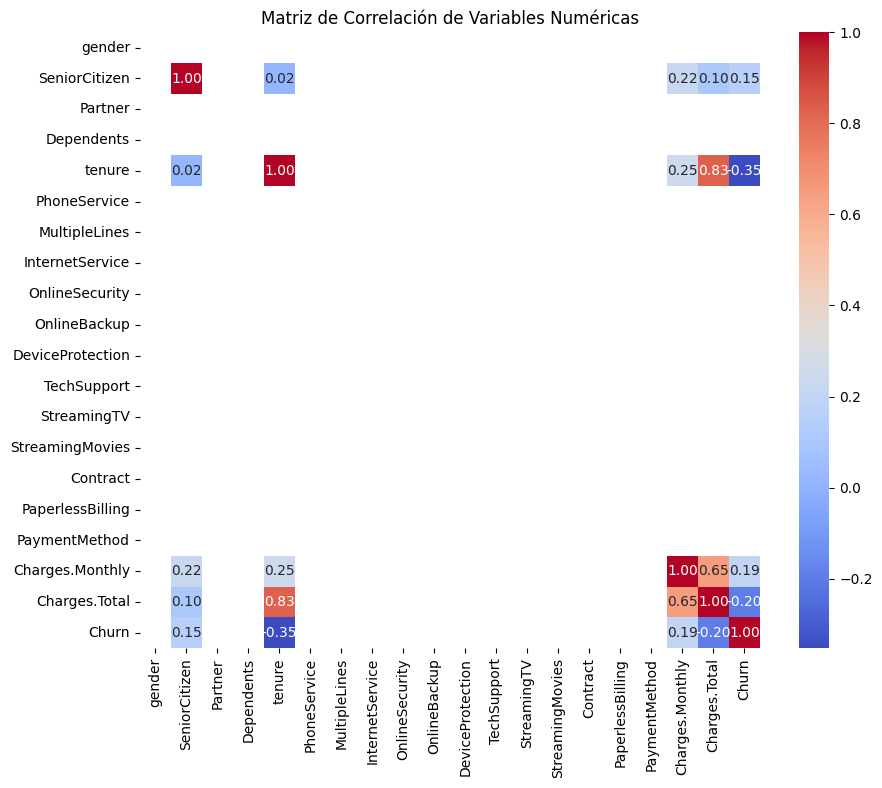

In [62]:
plt.figure(figsize=(10, 8))
correlation_matrix = datos_clientes_final[numeric_features + ['Churn']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

#### Para variables categóricas (usando Chi-Cuadrado para la relación con 'Churn')

In [63]:
print("\nAnálisis de Chi-Cuadrado para variables categóricas vs Churn:")
for col in categorical_features:
    contingency_table = pd.crosstab(datos_clientes_final[col], datos_clientes_final['Churn'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Variable: {col}, Valor p: {p:.4f}")
    if p < 0.05:
        print(f"  -> La variable '{col}' tiene una relación significativa con Churn.")


Análisis de Chi-Cuadrado para variables categóricas vs Churn:


## 4. Creación y Evaluación de Modelos Predictivos

#### Preprocesamiento:

Entrenando Regresión Logística...
Entrenando Regresión Logística...
Entrenando Random Forest...

--- Reporte de Clasificación para Regresión Logística ---
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1035
           1       0.50      0.73      0.59       374

    accuracy                           0.73      1409
   macro avg       0.69      0.73      0.70      1409
weighted avg       0.78      0.73      0.75      1409

Área bajo la curva ROC (AUC) para Regresión Logística: 0.8125


<Figure size 600x400 with 0 Axes>

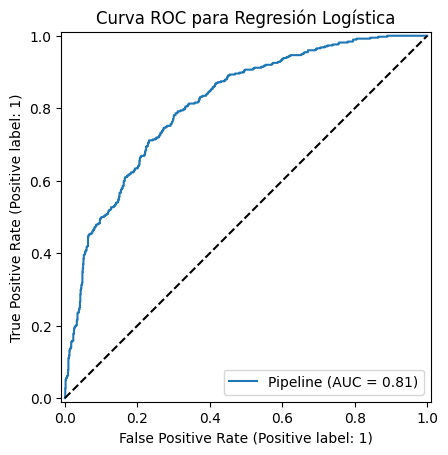

<Figure size 600x400 with 0 Axes>

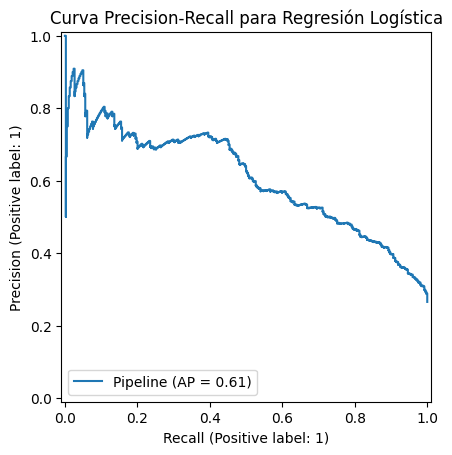

Puntuación de Precisión Promedio para Regresión Logística: 0.6077

--- Reporte de Clasificación para Random Forest ---
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1035
           1       0.52      0.57      0.54       374

    accuracy                           0.75      1409
   macro avg       0.68      0.69      0.68      1409
weighted avg       0.75      0.75      0.75      1409

Área bajo la curva ROC (AUC) para Random Forest: 0.7675


<Figure size 600x400 with 0 Axes>

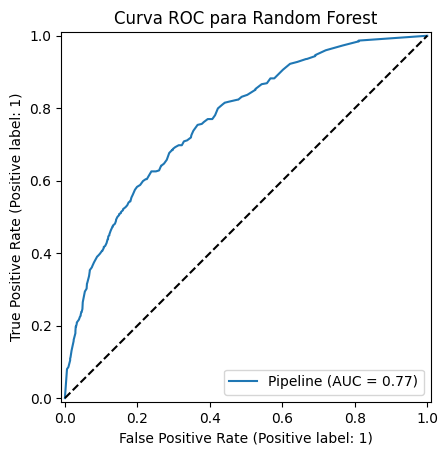

<Figure size 600x400 with 0 Axes>

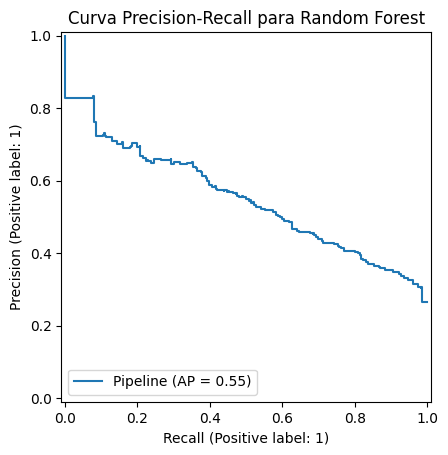

Puntuación de Precisión Promedio para Random Forest: 0.5486


In [64]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

### Uso de SMOTE para manejar el desbalance de clases
smote = SMOTE(random_state=42)

### Pipeline para modelo de Regresión Logística
model_lr = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', smote),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear'))
])

print("Entrenando Regresión Logística...")
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)
y_prob = model_lr.predict_proba(X_test)[:, 1]


### Pipeline para modelo Random Forest
model_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', smote),
    ('classifier', RandomForestClassifier(random_state=42))
])

## Entrenamiento de los modelos
print("Entrenando Regresión Logística...")
model_lr.fit(X_train, y_train)
print("Entrenando Random Forest...")
model_rf.fit(X_train, y_train)

## Evaluación de los modelos
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n--- Reporte de Clasificación para {model_name} ---")
    print(classification_report(y_test, y_pred))

    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"Área bajo la curva ROC (AUC) para {model_name}: {roc_auc:.4f}")

### Curva ROC
    plt.figure(figsize=(6, 4))
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f'Curva ROC para {model_name}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.show()

### Curva Precision-Recall
    plt.figure(figsize=(6, 4))
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
    plt.title(f'Curva Precision-Recall para {model_name}')
    plt.show()

    average_precision = average_precision_score(y_test, y_prob)
    print(f"Puntuación de Precisión Promedio para {model_name}: {average_precision:.4f}")

evaluate_model(model_lr, X_test, y_test, 'Regresión Logística')
evaluate_model(model_rf, X_test, y_test, 'Random Forest')


## 5. Análisis de Importancia de Variables

#### Analizar la importancia de las variables para el modelo Random Forest
#### El modelo de Regresión Logística tiene coeficientes que actúan como importancia, pero Random Forest es más directo con 'feature_importances_'

In [67]:
for col in categorical_features:
    X_train[col] = X_train[col].astype('object')
    X_test[col] = X_test[col].astype('object')
    preprocessor.fit(X_train)
    fitted_preprocessor = model_rf.named_steps['preprocessor']
    feature_names = fitted_preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
    all_features = numeric_features + feature_names

    importances = model_rf.named_steps['classifier'].feature_importances_
    feature_importance_df = pd.DataFrame({'feature': all_features, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))
    plt.title(f'Importancia de las Variables para (Random Forest)')
    plt.xlabel('Importancia')
    plt.ylabel('Variable')
    plt.show()

# **INFORME FINAL**

#### 1. ¿Quiénes son los clientes con mayor riesgo de evasión?
Los clientes con mayor riesgo de churn son aquellos con contratos mensuales, sin soporte técnico ni seguridad en línea, baja antigüedad (tenure) y cargos mensuales elevados

#### 2. ¿Qué variables influyen más en este comportamiento?
Las más importantes según el modelo son:
Tipo de contrato
TechSupport
Antigüedad
Cargos mensuales
Cargos totales
Servicio de fibra óptica
Servicios adicionales como Streaming TV, Online Security, etc

#### 3.¿Qué tipo de perfil de cliente necesita la empresa para mantenerse más cerca?
*   Clientes con contratos de largo plazo
*   Clientes con múltiples servicios
*   Clientes que utilizan servicios avanzados pero están satisfechos
*   Clientes con antiguedad





## **CONCLUSIÓN**

La alta tasa de churn es un problema significativo, exacerbado por el desequilibrio de clases, lo que nos indica que la empresa debe tomar medidas urgentes. El modelo de Random Forest demostró ser una herramienta muy efectiva para identificar clientes en riesgo, superando en métricas al modelo de Regresión Logística.

Basándose en los hallazgos del análisis, se recomienda a la empresa:

. Prioridad Estratégica: Implementar un programa agresivo de retención dirigido a clientes con contrato de mes a mes y aquellos con baja antigüedad.

. Ofertas Personalizadas: Utilizar los perfiles de riesgo para ofrecer paquetes de servicios atractivos que incentiven la permanencia y la adopción de contratos a largo plazo. Por ejemplo, ofrecer descuentos en la factura o servicios adicionales gratuitos a cambio de una renovación de contrato por un año.

. Mejora del Servicio de Fibra Óptica: Investigar las razones detrás del alto churn en el segmento de fibra óptica. Esto podría indicar problemas de calidad, precio o servicio al cliente. La mejora en este servicio es clave para la retención y para competir en el mercado.

. Segmentación y Comunicación: Desarrollar campañas de marketing dirigidas a los clientes identificados como de alto riesgo, con mensajes que resalten los beneficios de permanecer en la empresa. Utilizar la información sobre los servicios que tienen y los que no para ofrecerles soluciones que complementen su experiencia.

. Métrica de Éxito: Monitorear la tasa de churn, especialmente en el segmento de contratos de mes a mes, y medir el impacto de las iniciativas de retención. Utilizar el modelo predictivo como una herramienta continua para identificar y actuar sobre los clientes en riesgo antes de que se vayan.